In [27]:
#Importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [3]:
#Importing data
sp500_df = yf.download('^GSPC', 
                      start = '2020-05-25', 
                      end = '2021-05-25', 
                      interval = "1d",
                      progress = False)
sp500_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-26,3004.080078,3021.719971,2988.169922,2991.770020,2991.770020,5837060000
2020-05-27,3015.649902,3036.250000,2969.750000,3036.129883,3036.129883,6371230000
2020-05-28,3046.610107,3068.669922,3023.399902,3029.729980,3029.729980,5402670000
2020-05-29,3025.169922,3049.169922,2998.610107,3044.310059,3044.310059,7275080000
2020-06-01,3038.780029,3062.179932,3031.540039,3055.729980,3055.729980,4673410000


In [210]:
#Saving quotes in the separate variable
quotes = np.array(sp500_df["Close"])

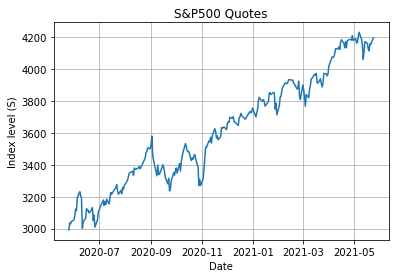

In [211]:
#Plotting S&P500 closing quotes
plt.plot(sp500_df.index, quotes)

#setting plot parameters;
plt.title("S&P500 Quotes")
plt.xlabel("Date")
plt.ylabel("Index level (S)")
plt.grid()

In [212]:
#Defining functions
def lookback_floating_put_price(S0, Smax, vol, r, q, T):
    
    if S0 == Smax:
        return S0
    else:
        b1 = (np.log(Smax / S0) + (- r + q + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
        b2 = b1 - vol * np.sqrt(T)
        b3 = (np.log(Smax / S0) + (r - q - 0.5 * vol**2) * T) / (vol * np.sqrt(T))
        Y2 = (2 * (r - q - 0.5 * vol**2) * np.log(Smax / S0)) / vol**2

        N_b1 = norm.pdf(b1)
        N_b2 = norm.pdf(b2)
        N_minus_b2 = norm.pdf(-b2)
        N_minus_b3 = norm.pdf(-b3)

        part1 = Smax * np.exp(-q * T) * (N_b1 - 0.5 * vol**2 / (r - q) * np.exp(Y2) * N_minus_b3)
        part2 = S0 * np.exp(-q * T) * (0.5 * vol**2 / (r - q) * N_minus_b2  - N_b2)

        return part1 + part2

def volatility(array, annual):
        return np.std(np.diff(np.log(np.array(array)))) * np.sqrt(annual)

In [214]:
#Setting parameters
S0 = quotes[0]
Smax = np.max(quotes)
vol = volatility(quotes, 252)
r = 0.0013
q = 0
T = 2

In [215]:
#Estimating the price 
lookback_floating_put_price(S0, Smax, vol, r, q, T)

-14.446334733776894